# Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout, RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from keras.models import Sequential
from tensorflow.keras.regularizers import L2, L1, L1L2

In [5]:
from keras.datasets import cifar10, mnist, fashion_mnist

(cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = cifar10.load_data()

(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

(fashion_mnist_x_train, fashion_mnist_y_train), (fashion_mnist_x_test, fashion_mnist_y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Training

## cifar10

In [6]:
from keras.utils import to_categorical
numclass=10;
cifar10_y_train=to_categorical(cifar10_y_train,numclass)
cifar10_y_test=to_categorical(cifar10_y_test,numclass)

In [10]:
regul_weight = 5e-6

model = Sequential()

model.add(RandomFlip(mode = 'horizontal'))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3),
                   kernel_regularizer=L2(regul_weight)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',
                   kernel_regularizer=L2(regul_weight)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(1280, activation='relu',
                   kernel_regularizer=L2(regul_weight)))
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9), metrics = ['accuracy'])



In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 13, 13, 64)      

In [6]:
batch_size = 128
epochs = 150
history_cifar10 = model.fit(cifar10_x_train, cifar10_y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (cifar10_x_test, cifar10_y_test))

Epoch 1/150
391/391 [==============================] - 16s 9ms/step - loss: 1.5744 - accuracy: 0.4664 - val_loss: 1.5447 - val_accuracy: 0.4783
Epoch 2/150
391/391 [==============================] - 3s 9ms/step - loss: 1.1660 - accuracy: 0.5927 - val_loss: 1.1197 - val_accuracy: 0.6095
Epoch 3/150
391/391 [==============================] - 4s 11ms/step - loss: 0.9918 - accuracy: 0.6567 - val_loss: 0.9348 - val_accuracy: 0.6769
Epoch 4/150
391/391 [==============================] - 5s 12ms/step - loss: 0.8739 - accuracy: 0.6989 - val_loss: 0.9744 - val_accuracy: 0.6686
Epoch 5/150
391/391 [==============================] - 6s 15ms/step - loss: 0.7933 - accuracy: 0.7263 - val_loss: 0.8307 - val_accuracy: 0.7162
Epoch 6/150
391/391 [==============================] - 5s 12ms/step - loss: 0.7332 - accuracy: 0.7481 - val_loss: 0.8714 - val_accuracy: 0.7016
Epoch 7/150
391/391 [==============================] - 6s 14ms/step - loss: 0.6804 - accuracy: 0.7676 - val_loss: 0.9083 - val_accuracy: 

Text(0.5, 1.0, 'Test accuracy for Cifar10 Dataset')

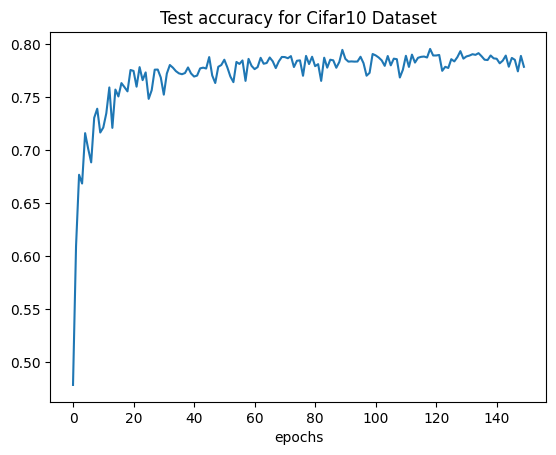

In [7]:
plt.plot(history_cifar10.history['val_accuracy'])
plt.xlabel('epochs')
plt.title('Test accuracy for Cifar10 Dataset')

Text(0.5, 1.0, 'Train accuracy for Cifar10 Dataset')

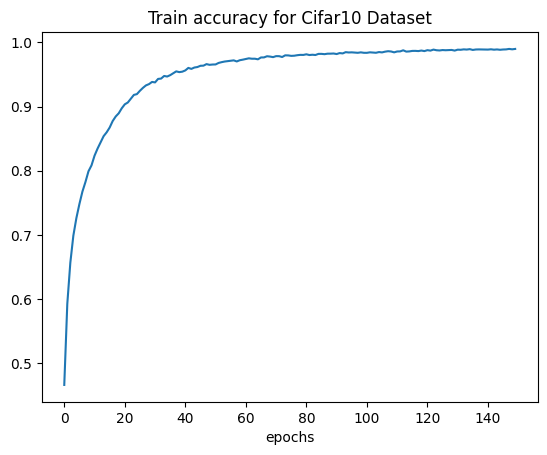

In [8]:
plt.plot(history_cifar10.history['accuracy'])
plt.xlabel('epochs')
plt.title('Train accuracy for Cifar10 Dataset')

Text(0.5, 1.0, 'Train Loss Function for cifar10 Dataset')

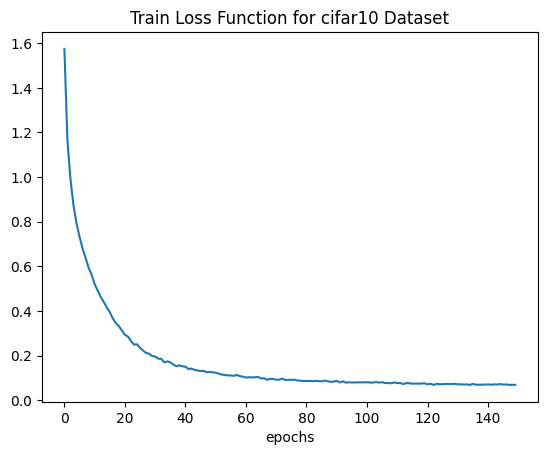

In [9]:
plt.plot(history_cifar10.history['loss'])
plt.xlabel('epochs')
plt.title('Train Loss Function for cifar10 Dataset')

## fashion mnist

In [10]:
from keras.utils import to_categorical
numclass=10;
fashion_mnist_y_train=to_categorical(fashion_mnist_y_train,numclass)
fashion_mnist_y_test=to_categorical(fashion_mnist_y_test,numclass)

In [11]:
fashion_mnist_x_train = tf.reshape(fashion_mnist_x_train, (60000,28,28,1))
fashion_mnist_x_test = tf.reshape(fashion_mnist_x_test, (10000,28,28,1))

In [12]:
regul_weight = 5e-6

model = Sequential()
model.add(RandomFlip( mode="horizontal"))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1),
                    kernel_regularizer=L2(regul_weight)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', kernel_regularizer=L2(regul_weight)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(1280, activation='relu', kernel_regularizer=L2(regul_weight)))
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9), metrics = ['accuracy'])



In [13]:
batch_size = 128
epochs = 150
history_fashion_mnist = model.fit(fashion_mnist_x_train, fashion_mnist_y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (fashion_mnist_x_test, fashion_mnist_y_test))

Epoch 1/150
469/469 [==============================] - 6s 9ms/step - loss: 0.5120 - accuracy: 0.8245 - val_loss: 0.4153 - val_accuracy: 0.8518
Epoch 2/150
469/469 [==============================] - 3s 7ms/step - loss: 0.3488 - accuracy: 0.8750 - val_loss: 0.3121 - val_accuracy: 0.8886
Epoch 3/150
469/469 [==============================] - 3s 7ms/step - loss: 0.3084 - accuracy: 0.8902 - val_loss: 0.3049 - val_accuracy: 0.8927
Epoch 4/150
469/469 [==============================] - 3s 7ms/step - loss: 0.2813 - accuracy: 0.8987 - val_loss: 0.2765 - val_accuracy: 0.9013
Epoch 5/150
469/469 [==============================] - 4s 8ms/step - loss: 0.2592 - accuracy: 0.9067 - val_loss: 0.3174 - val_accuracy: 0.8842
Epoch 6/150
469/469 [==============================] - 3s 7ms/step - loss: 0.2426 - accuracy: 0.9133 - val_loss: 0.2680 - val_accuracy: 0.9060
Epoch 7/150
469/469 [==============================] - 3s 7ms/step - loss: 0.2264 - accuracy: 0.9191 - val_loss: 0.2597 - val_accuracy: 0.9109

Text(0.5, 1.0, 'Test accuracy for Fashion MNIST Dataset')

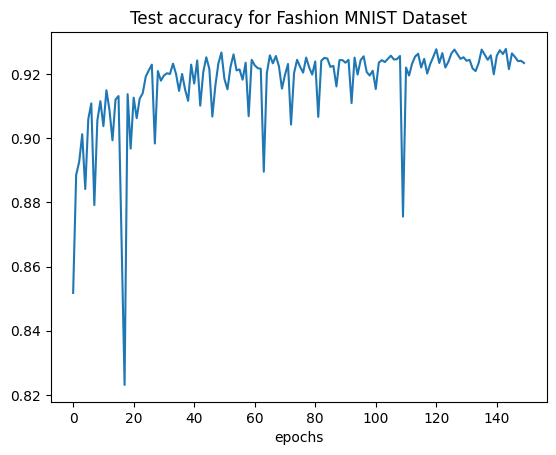

In [14]:
plt.plot(history_fashion_mnist.history['val_accuracy'])
plt.xlabel('epochs')
plt.title('Test accuracy for Fashion MNIST Dataset')

Text(0.5, 1.0, 'Train accuracy for Fashion MNIST Dataset')

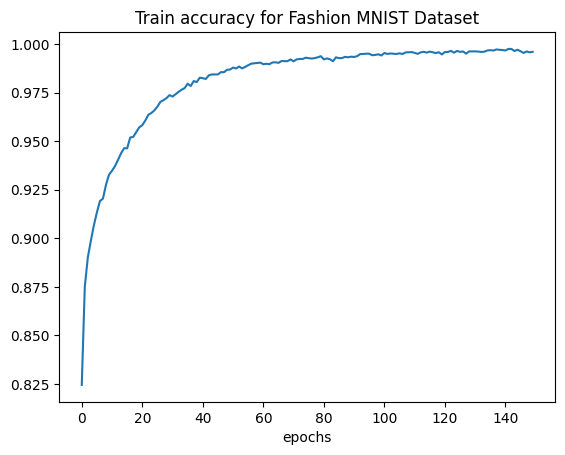

In [15]:
plt.plot(history_fashion_mnist.history['accuracy'])
plt.xlabel('epochs')
plt.title('Train accuracy for Fashion MNIST Dataset')

Text(0.5, 1.0, 'Train Loss Function for Fashion MNIST Dataset')

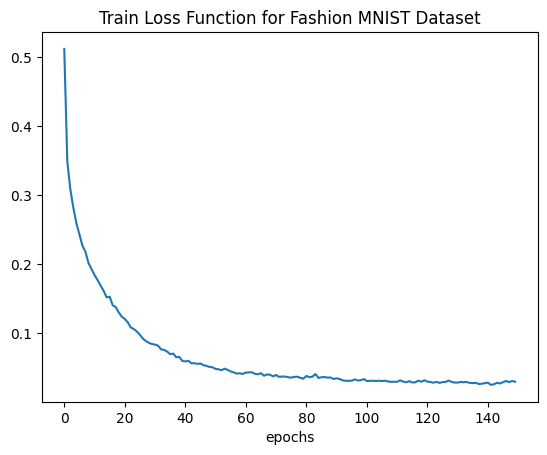

In [16]:
plt.plot(history_fashion_mnist.history['loss'])
plt.xlabel('epochs')
plt.title('Train Loss Function for Fashion MNIST Dataset')

## mnist

In [ ]:
from keras.utils import to_categorical
numclass=10;
mnist_y_train=to_categorical(mnist_y_train,numclass)
mnist_y_test=to_categorical(mnist_y_test,numclass)

In [ ]:
regul_weight = 5e-6

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1), kernel_regularizer=L2(regul_weight)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', kernel_regularizer=L2(regul_weight)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(1280, activation='relu', kernel_regularizer=L2(regul_weight)))
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9), metrics = ['accuracy'])



In [ ]:
batch_size = 128
epochs = 150
history_mnist = model.fit(mnist_x_train, mnist_y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (mnist_x_test, mnist_y_test))

Epoch 1/150
469/469 [==============================] - 15s 7ms/step - loss: 0.1598 - accuracy: 0.9558 - val_loss: 0.0521 - val_accuracy: 0.9853
Epoch 2/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0539 - accuracy: 0.9853 - val_loss: 0.0378 - val_accuracy: 0.9892
Epoch 3/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0401 - accuracy: 0.9898 - val_loss: 0.0337 - val_accuracy: 0.9912
Epoch 4/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0322 - accuracy: 0.9923 - val_loss: 0.0342 - val_accuracy: 0.9913
Epoch 5/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0263 - accuracy: 0.9940 - val_loss: 0.0321 - val_accuracy: 0.9924
Epoch 6/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0246 - accuracy: 0.9945 - val_loss: 0.0353 - val_accuracy: 0.9917
Epoch 7/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0189 - accuracy: 0.9963 - val_loss: 0.0313 - val_accuracy: 0.993

Text(0.5, 1.0, 'Test accuracy for MNIST Dataset')

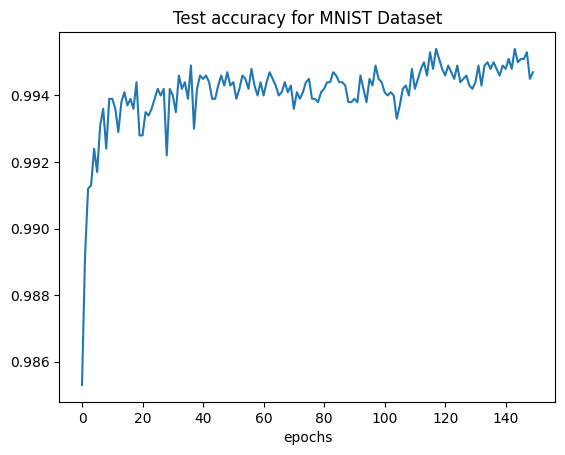

In [ ]:
plt.plot(history_mnist.history['val_accuracy'])
plt.xlabel('epochs')
plt.title('Test accuracy for MNIST Dataset')

Text(0.5, 1.0, 'Train accuracy for MNIST Dataset')

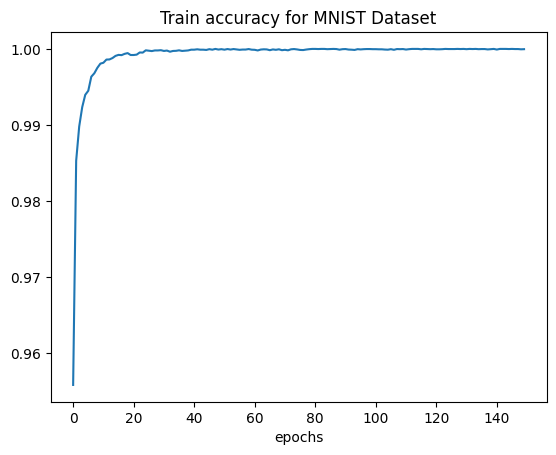

In [ ]:
plt.plot(history_mnist.history['accuracy'])
plt.xlabel('epochs')
plt.title('Train accuracy for MNIST Dataset')

Text(0.5, 1.0, 'Train Loss Function for MNIST Dataset')

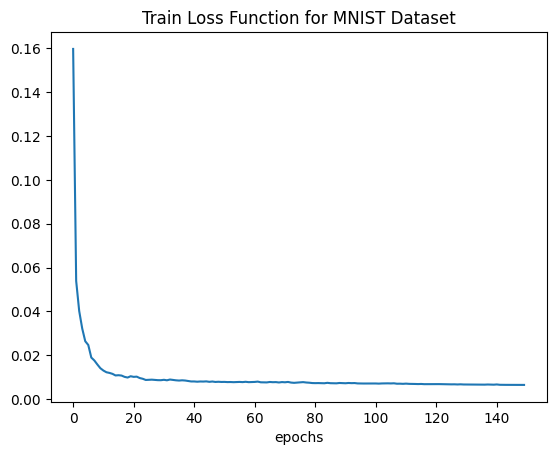

In [ ]:
plt.plot(history_mnist.history['loss'])
plt.xlabel('epochs')
plt.title('Train Loss Function for MNIST Dataset')